# K-Means Clustering

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
%matplotlib inline

# Dataset 1

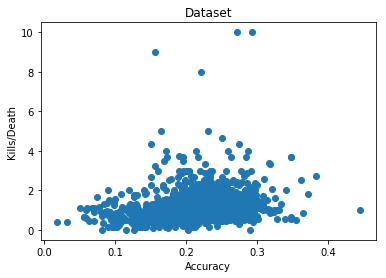

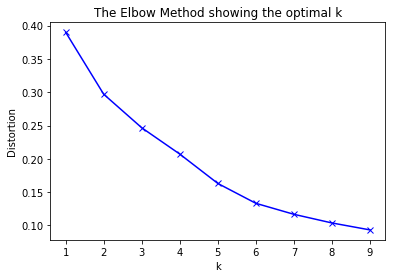

In [29]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('C2.csv')
x1 = data['k/d'].values
x2 = data['accuracy'].values

plt.plot()

plt.title('Dataset')
plt.xlabel('Accuracy')
plt.ylabel('Kills/Death')
plt.scatter(x1, x2)
plt.show()

#create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

#k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

#Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
plt.savefig('elbow.png')

In [46]:
import numpy as np
import matplotlib.pyplot as plt


def read(path):
    points = []
    with open(path, encoding='utf8') as f:
        for index, line in enumerate(f):
            s = line.split()
            point = s[1:]
            point = np.array([float(v) for v in point])
            points.append(point)
    return points


def plot(points, axis=None):
    x = [v[0] for v in points]
    y = [v[1] for v in points]

    plt.scatter(x, y)
    if axis is not None:
        plt.axis(axis)
    plt.show()


def plot_cluster(list_points, size=50, axis=None):
    """Plot all the clusters
    Args:
        list_points: list(list(point))
    """
    colors = ['red', 'blue', 'green', 'orange','pink','purple']
    for color, points in zip(colors, list_points):
        x = [v[0] for v in points]
        y = [v[1] for v in points]
        plt.scatter(x, y, s=size, color=color)
    if axis is not None:
        plt.axis(axis)
    plt.xlabel('Accuracy')
    plt.ylabel('Kills/Death')
    plt.title('6-Means Lloyds Clustering')
    plt.show()


def collect_clusters(points, mappings):
    """Transform the mappings into a list of clusters.
    """
    assert len(points) == len(mappings)
    n = len(points)
    tmp_mapping = dict()

    for i in range(n):
        if mappings[i] not in tmp_mapping:
            tmp_mapping[mappings[i]] = []
        tmp_mapping[mappings[i]].append(points[i])

    reval = list(tmp_mapping.values())
    return reval


def collect_centers(points, mappings):
    centers = set(mappings)
    centers = [points[i] for i in centers]
    return centers


def norm2(a, b):
    """Calculate the norm2 distance between a and b.
    Args:
        a: np.array
        b. np.array
    Returns:
        float
    """
    return np.sqrt(sum((a-b)**2))


def cost(points, mapping, centers, dis):
    n = len(points)
    diss = [dis(points[i], centers[mapping[i]]) for i in range(n)]
    diss = np.array(diss)
    max_cost = max(diss)

    mean_cost = np.sqrt(sum(diss**2)/n)

    return max_cost, mean_cost


def density(result):
    """ Calculate the cumulative density.
    """
    unique = list(set(result))
    unique = sorted(unique)
    y = []
    for x in unique:
        count = len([i for i in result if i <= x])
        y.append(count/len(result))
    return unique, y


def plot_density(x, y):
    x=[0.9434167244060335,0.9434167244060335,2.7142310473085756]
    y=[0,1,1]
    plt.plot(x, y)
    plt.xlabel('3-means cost', fontsize=20)
    plt.ylabel('Probability', fontsize=20)
    #plt.axis([4, 30, 0.5, 1.0])
    plt.show()

# Gonzalez - Dataset 1

centers:[array([0.175, 0.63 ]), array([0.186, 1.71 ]), array([0.383, 2.75 ]), array([0.221, 8.   ]), array([0.23, 5.  ]), array([ 0.292, 10.   ])]


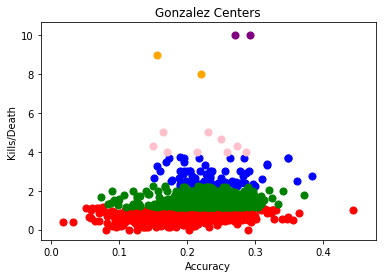

In [45]:
import numpy as np
#import utils

def clustering(points, k, dis):
    """
    Args:
        points: list(np.array)
        k: int
    Returns:
        mapping: list(int) - mapping[i] represent the center of i-th point.
        C: list(int) - Record the center for each cluster.
    """
    mapping = [0] * len(points)
    n = len(points)

    for i in range(1, k):
        M = 0
        center = 0
        # Find the farthest point
        for j in range(n):
            d = dis(points[j], points[mapping[j]])
            if d > M:
                M = d
                center = j

        # Updating the mapping table
        for j in range(n):
            d = dis(points[j], points[center])
            if dis(points[j], points[mapping[j]]) > d:
                mapping[j] = center
    return mapping

def cost(points, mapping, centers, dis):
    n = len(points)
    dis = [dis(points[i], centers[mapping[i]]) for i in range(n)]
    dis = np.array(dis)
    max_cost = max(dis)

    mean_cost = np.sqrt(sum(dis**2)/n)

    return max_cost, mean_cost

if __name__ == '__main__':
    path = 'C2.txt'
    points = read(path)
    mappings = clustering(points, k=6, dis=norm2)
    max_cost, mean_cost = cost(points, mappings, points, norm2)
    centers = collect_centers(points, mappings)
    print('centers:' + str(centers))

    clusters = collect_clusters(points, mappings)
    plot_cluster(clusters)

# K-Means Clustering using Lloyds- Dataset 1

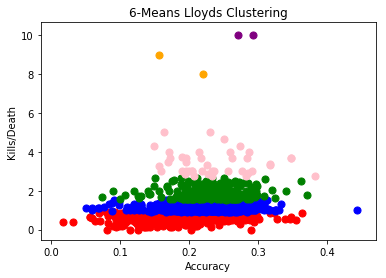

In [47]:
import numpy as np

#import utils

class Lloyd:
    """The class for k-means clustering.
    """
    def __init__(self, dis_func=None):
        if dis_func is None:
            self._dis_func = norm2
        else:
            self._dis_func = dis_func

    def clustering(self, points, k, max_iter, init_centers=None):
        """Run the k-means algorithm.
        There are three conditions to terminate the clustering
        porcess:
        1. The number of changed centers between two
           interations is small enough.
        2. The interation time is larger than the max iteration time.
        3. Between 2 iterations, there no difference in centers.
        Args:
            points: list(np.array) - A list of points need to be clustered.
            k: int - The number of clusters.
            max_iter: int - The max iteration time.
            init_centers: list(np.array) - A list of initial centers
                          with size k.
        Returns:
            mapping: list(int) - mapping[i] records
                     index of the center for i-th point.
            centers: list(np.array) - A list of centers.
        """
        if init_centers is None:
            centers = self._initialize_centers(points, k)
        else:
            assert len(init_centers) == k
            centers = init_centers
        old_centers = None
        counter = 0
        while counter <= max_iter and self._diff(old_centers, centers) > 0:
            old_centers = centers[:]
            mapping = self._assign_closest(points, old_centers)

            centers = self._generate_centers(points, mapping, k)
            counter += 1
        clusters = collect_clusters(points, mapping)
        plot_cluster(clusters)
        return mapping, centers

    def _initialize_centers(self, points, k):
        """Initialze the k centers.
        Returns:
            centers: list(np.array) - A list of points with size k.
        """
        # Use first k points as the initial centers
        centers = points[:k]

        assert len(centers) == k
        return centers

    def _assign_closest(self, points, centers):
        """Assign each point to its centers.
        Args:
            points: list(np.array) - A list of points
            centers: list(np.array) - A list of centers.
        Returns:
            mapping: list(int) - A mapping from each point
                        to its center.
        """
        mapping = [-1] * len(points)
        dis_func = self._dis_func
        for i, p in enumerate(points):
            diss = [(dis_func(p, c), j) for j, c in enumerate(centers)]
            mapping[i] = min(diss, key=lambda x: x[0])[-1]
        return mapping

    def _generate_centers(self, points, mapping, k):
        """Generate the new centers given the old centers.
        Args:
            points: list(np.array) - A list of points.
            mapping: list(int) - A mapping from each point to its center.
        """
        assert len(points) == len(mapping)
        centers = []
        for i in range(k):
            subsets = np.array([points[j] for j, val in enumerate(mapping)
                                if val == i])
            centers.append(subsets.mean(axis=0))
        return centers

    def _diff(self, old_centers, centers):
        """Compare the centers bwtween two iterations.
        Args:
            old_centers: list(np.array) - A list of centers.
            centers: list(np.array) - A list of centers.
        Returns:
            float - The fraction of difference centers.
        """
        if old_centers is None:
            return len(centers)
        assert len(old_centers) == len(centers)
        counter = 0
        counter = sum([1 for p, q in zip(old_centers, centers)
                       if ((p == q).all())])
        n = len(old_centers)
        return (n-counter) / n


def compare(clusterA, clusterB):
    """Compare two clusters.
    """
    if len(clusterB) != len(clusterA):
        return False
    try:
        for subset in clusterA:
            if subset not in clusterB:
                return False
        for subset in clusterB:
            if subset not in clusterA:
                return False
    except ValueError:
        print(subset)
    return True

if __name__ == '__main__':
    path = 'C2.txt'
    points = read(path)

    clus = Lloyd()
    k = 6

    init_centers = points[:k]
    init_centers = []

# 6 Gonzalez Centers for Kills/Death vs Accuracy
    init_centers.append(points[0])
    init_centers.append(points[683])
    init_centers.append(points[144])
    init_centers.append(points[2237])
    init_centers.append(points[766])
    init_centers.append(points[767])	
    
    mapping, centers = clus.clustering(points, k, 50, init_centers)
    max_cost, mean_cost = cost(points, mapping, centers, norm2)

# Dataset 2

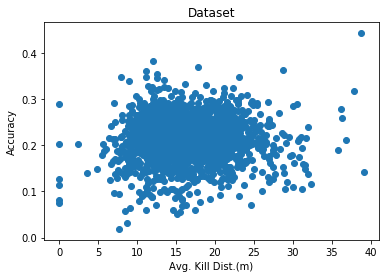

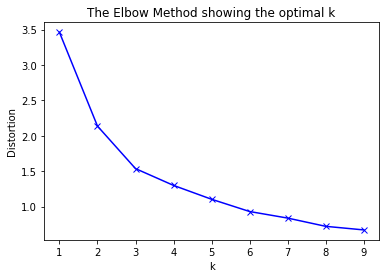

In [48]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('C3.csv')
x1 = data['k/d'].values
x2 = data['assists'].values

plt.plot()

plt.title('Dataset')
plt.xlabel('Avg. Kill Dist.(m)')
plt.ylabel('Accuracy')
plt.scatter(x1, x2)
plt.show()

#create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

#k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

#Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
plt.savefig('elbow.png')

In [61]:
import numpy as np
import matplotlib.pyplot as plt


def read(path):
    points = []
    with open(path, encoding='utf8') as f:
        for index, line in enumerate(f):
            s = line.split()
            point = s[1:]
            point = np.array([float(v) for v in point])
            points.append(point)
    return points


def plot(points, axis=None):
    x = [v[0] for v in points]
    y = [v[1] for v in points]

    plt.scatter(x, y)
    if axis is not None:
        plt.axis(axis)
    plt.show()


def plot_cluster(list_points, size=50, axis=None):
    """Plot all the clusters
    Args:
        list_points: list(list(point))
    """
    colors = ['red', 'blue', 'green', 'orange','pink','purple']
    for color, points in zip(colors, list_points):
        x = [v[0] for v in points]
        y = [v[1] for v in points]
        plt.scatter(x, y, s=size, color=color)
    if axis is not None:
        plt.axis(axis)
    plt.xlabel('Avg. Kill Dist.(m)')
    plt.ylabel('Accuracy')
    plt.title('3-Means Lloyds Clustering')
    plt.show()


def collect_clusters(points, mappings):
    """Transform the mappings into a list of clusters.
    """
    assert len(points) == len(mappings)
    n = len(points)
    tmp_mapping = dict()

    for i in range(n):
        if mappings[i] not in tmp_mapping:
            tmp_mapping[mappings[i]] = []
        tmp_mapping[mappings[i]].append(points[i])

    reval = list(tmp_mapping.values())
    return reval


def collect_centers(points, mappings):
    centers = set(mappings)
    centers = [points[i] for i in centers]
    return centers


def norm2(a, b):
    """Calculate the norm2 distance between a and b.
    Args:
        a: np.array
        b. np.array
    Returns:
        float
    """
    return np.sqrt(sum((a-b)**2))


def cost(points, mapping, centers, dis):
    n = len(points)
    diss = [dis(points[i], centers[mapping[i]]) for i in range(n)]
    diss = np.array(diss)
    max_cost = max(diss)

    mean_cost = np.sqrt(sum(diss**2)/n)

    return max_cost, mean_cost


def density(result):
    """ Calculate the cumulative density.
    """
    unique = list(set(result))
    unique = sorted(unique)
    y = []
    for x in unique:
        count = len([i for i in result if i <= x])
        y.append(count/len(result))
    return unique, y


def plot_density(x, y):
    x=[0.9434167244060335,0.9434167244060335,2.7142310473085756]
    y=[0,1,1]
    plt.plot(x, y)
    plt.xlabel('3-means cost', fontsize=20)
    plt.ylabel('Probability', fontsize=20)
    #plt.axis([4, 30, 0.5, 1.0])
    plt.show()

# Gonzalez - Dataset 2

centers:[array([23.1  ,  0.175]), array([0.  , 0.29]), array([39.1  ,  0.142])]


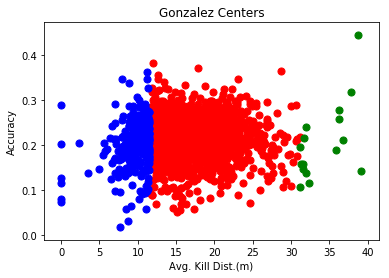

In [60]:
import numpy as np
#import utils

def clustering(points, k, dis):
    """
    Args:
        points: list(np.array)
        k: int
    Returns:
        mapping: list(int) - mapping[i] represent the center of i-th point.
        C: list(int) - Record the center for each cluster.
    """
    mapping = [0] * len(points)
    n = len(points)

    for i in range(1, k):
        M = 0
        center = 0
        # Find the farthest point
        for j in range(n):
            d = dis(points[j], points[mapping[j]])
            if d > M:
                M = d
                center = j

        # Updating the mapping table
        for j in range(n):
            d = dis(points[j], points[center])
            if dis(points[j], points[mapping[j]]) > d:
                mapping[j] = center
    return mapping

def cost(points, mapping, centers, dis):
    n = len(points)
    dis = [dis(points[i], centers[mapping[i]]) for i in range(n)]
    dis = np.array(dis)
    max_cost = max(dis)

    mean_cost = np.sqrt(sum(dis**2)/n)

    return max_cost, mean_cost

if __name__ == '__main__':
    path = 'C3.txt'
    points = read(path)
    mappings = clustering(points, k=3, dis=norm2)
    max_cost, mean_cost = cost(points, mappings, points, norm2)
    centers = collect_centers(points, mappings)
    print('centers:' + str(centers))

    clusters = collect_clusters(points, mappings)
    plot_cluster(clusters)

# K-Means Clustering using Lloyds- Dataset 2

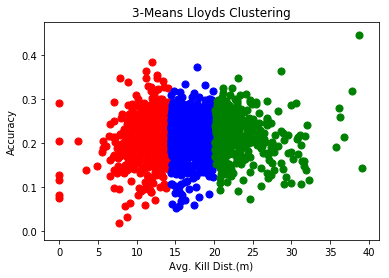

In [62]:
import numpy as np

#import utils

class Lloyd:
    """The class for k-means clustering.
    """
    def __init__(self, dis_func=None):
        if dis_func is None:
            self._dis_func = norm2
        else:
            self._dis_func = dis_func

    def clustering(self, points, k, max_iter, init_centers=None):
        """Run the k-means algorithm.
        There are three conditions to terminate the clustering
        porcess:
        1. The number of changed centers between two
           interations is small enough.
        2. The interation time is larger than the max iteration time.
        3. Between 2 iterations, there no difference in centers.
        Args:
            points: list(np.array) - A list of points need to be clustered.
            k: int - The number of clusters.
            max_iter: int - The max iteration time.
            init_centers: list(np.array) - A list of initial centers
                          with size k.
        Returns:
            mapping: list(int) - mapping[i] records
                     index of the center for i-th point.
            centers: list(np.array) - A list of centers.
        """
        if init_centers is None:
            centers = self._initialize_centers(points, k)
        else:
            assert len(init_centers) == k
            centers = init_centers
        old_centers = None
        counter = 0
        while counter <= max_iter and self._diff(old_centers, centers) > 0:
            old_centers = centers[:]
            mapping = self._assign_closest(points, old_centers)

            centers = self._generate_centers(points, mapping, k)
            counter += 1
        clusters = collect_clusters(points, mapping)
        plot_cluster(clusters)
        return mapping, centers

    def _initialize_centers(self, points, k):
        """Initialze the k centers.
        Returns:
            centers: list(np.array) - A list of points with size k.
        """
        # Use first k points as the initial centers
        centers = points[:k]

        assert len(centers) == k
        return centers

    def _assign_closest(self, points, centers):
        """Assign each point to its centers.
        Args:
            points: list(np.array) - A list of points
            centers: list(np.array) - A list of centers.
        Returns:
            mapping: list(int) - A mapping from each point
                        to its center.
        """
        mapping = [-1] * len(points)
        dis_func = self._dis_func
        for i, p in enumerate(points):
            diss = [(dis_func(p, c), j) for j, c in enumerate(centers)]
            mapping[i] = min(diss, key=lambda x: x[0])[-1]
        return mapping

    def _generate_centers(self, points, mapping, k):
        """Generate the new centers given the old centers.
        Args:
            points: list(np.array) - A list of points.
            mapping: list(int) - A mapping from each point to its center.
        """
        assert len(points) == len(mapping)
        centers = []
        for i in range(k):
            subsets = np.array([points[j] for j, val in enumerate(mapping)
                                if val == i])
            centers.append(subsets.mean(axis=0))
        return centers

    def _diff(self, old_centers, centers):
        """Compare the centers bwtween two iterations.
        Args:
            old_centers: list(np.array) - A list of centers.
            centers: list(np.array) - A list of centers.
        Returns:
            float - The fraction of difference centers.
        """
        if old_centers is None:
            return len(centers)
        assert len(old_centers) == len(centers)
        counter = 0
        counter = sum([1 for p, q in zip(old_centers, centers)
                       if ((p == q).all())])
        n = len(old_centers)
        return (n-counter) / n


def compare(clusterA, clusterB):
    """Compare two clusters.
    """
    if len(clusterB) != len(clusterA):
        return False
    try:
        for subset in clusterA:
            if subset not in clusterB:
                return False
        for subset in clusterB:
            if subset not in clusterA:
                return False
    except ValueError:
        print(subset)
    return True

if __name__ == '__main__':
    path = 'C3.txt'
    points = read(path)
    #print(points)
    clus = Lloyd()
    k = 3

    init_centers = points[:k]
    init_centers = []
# 3 Gonzalez Centers for Accuracy vs Avg. Kill Dist.
    init_centers.append(points[767])
    init_centers.append(points[1458])
    init_centers.append(points[0])

    
    mapping, centers = clus.clustering(points, k, 50, init_centers)
    max_cost, mean_cost = cost(points, mapping, centers, norm2)
    